In [2]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.18.5 | Pandas version: 1.0.5 | Seaborn version: 0.10.1'

In [4]:
# Importing the data for analysis
df_data = pd.read_csv('C:\\Users\\kinch\\Downloads\\train.csv')

In [5]:
# Changing default display options for better visibility of data
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

In [6]:
df_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Getting deatils for data dictionary
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')


Shape of dataframe:
(1460, 81)

Count of dataframe:
Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1

In [8]:
# Dropping duplicate values in dataset, if exist
df_data = df_data.drop_duplicates()
print(f'\nShape of dataframe:\n{df_data.shape}')
df_data.head()


Shape of dataframe:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Removing identifier field
df_data.drop(['Id'], axis=1, inplace=True)

In [10]:
# Removing columns where unique values are 1 as it illustrates that all values are same in column
uniques = df_data.apply(lambda x:x.nunique())
df_loan = df_data.drop(uniques[uniques < 2].index, axis = 1)
print(df_data.shape)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))


(1460, 80)
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00


In [11]:
# Dropping Columns with more than 15 % missing values
df_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))


MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [12]:
# Analysing columns which still have NaN values
print(df_data['MasVnrType'].describe(), end='\n\n')      # 0.55% NaN
print(df_data['MasVnrArea'].describe(), end='\n\n')      # 0.55% NaN
print(df_data['BsmtQual'].describe(), end='\n\n')        # 2.53% NaN
print(df_data['BsmtCond'].describe(), end='\n\n')        # 2.53% NaN
print(df_data['BsmtExposure'].describe(), end='\n\n')    # 2.60% NaN
print(df_data['BsmtFinType1'].describe(), end='\n\n')    # 2.53% NaN
print(df_data['BsmtFinType2'].describe(), end='\n\n')    # 2.60% NaN
print(df_data['Electrical'].describe(), end='\n\n')      # 0.07% NaN
print(df_data['GarageType'].describe(), end='\n\n')      # 5.55% NaN
print(df_data['GarageYrBlt'].describe(), end='\n\n')     # 5.55% NaN
print(df_data['GarageFinish'].describe(), end='\n\n')    # 5.55% NaN
print(df_data['GarageQual'].describe(), end='\n\n')      # 5.55% NaN
print(df_data['GarageCond'].describe(), end='\n\n')      # 5.55% NaN


count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

count    1379.000000
mean     1978.50616

In [13]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
df_data.dropna(axis='rows', inplace=True)
# Checking for percentage of missing values per column
print(df_data.shape)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))


(1338, 74)
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
Ha

In [14]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df_data['DiffYearBuilt'] = pd.datetime.now().year - df_data['YearBuilt']
df_data['DiffYearRemodAdd'] = pd.datetime.now().year - df_data['YearRemodAdd']
df_data['DiffGarageYrBlt'] = pd.datetime.now().year - df_data['GarageYrBlt']


In [15]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.

# OUTCOME COLUMN:
out_col = 'SalePrice'

# NUMERICAL COLUMNS: 
num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
print(len(num_col))

# CATEGORICAL COLUMNS: 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(cat_col))

# Listing distinct variables for each Categorical columns to address issues if any
for col in cat_col:
    print(col,' : ',df_data[col].unique())


30
43
MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 

In [16]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]])

In [17]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = df_data[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df_data[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]], order=my_order.index)


<Figure size 432x288 with 0 Axes>

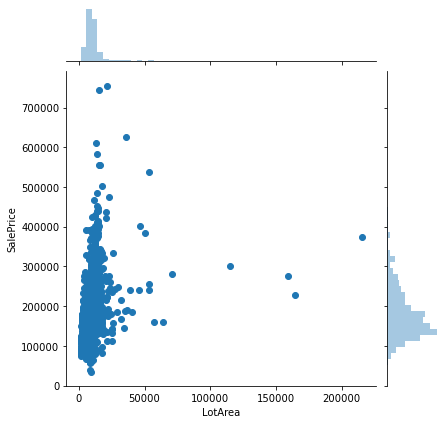

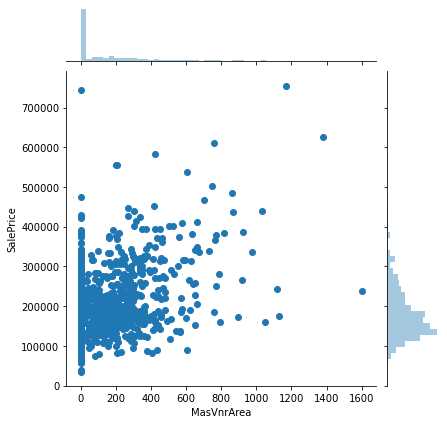

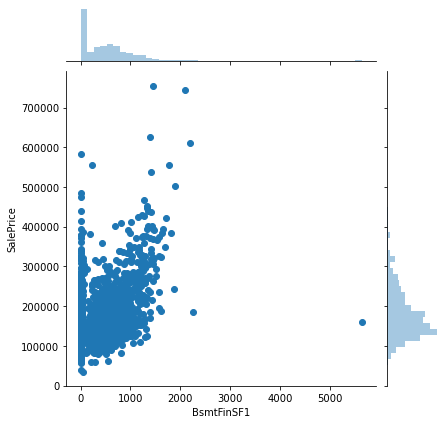

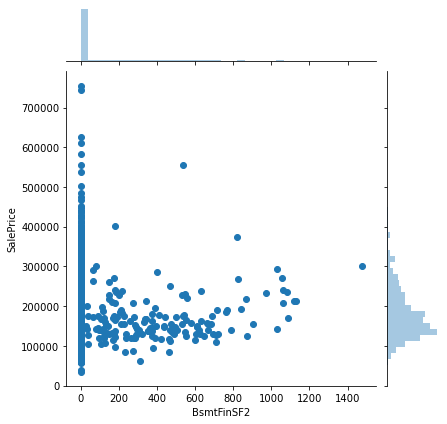

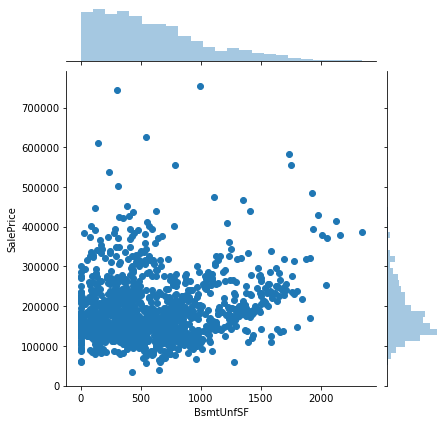

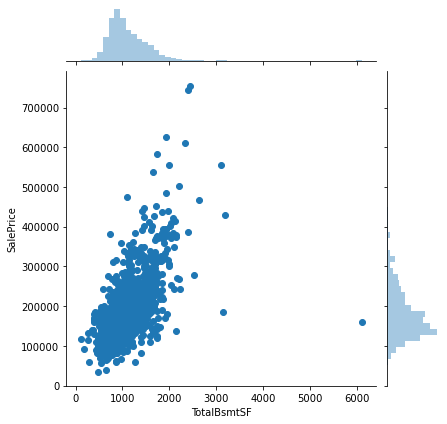

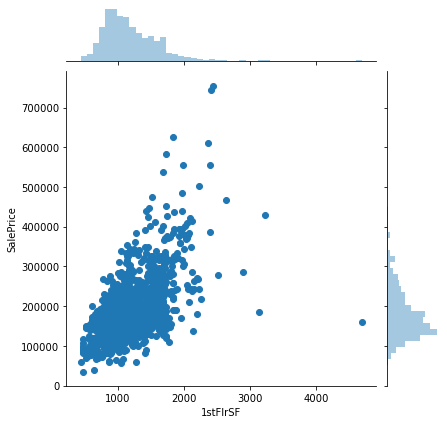

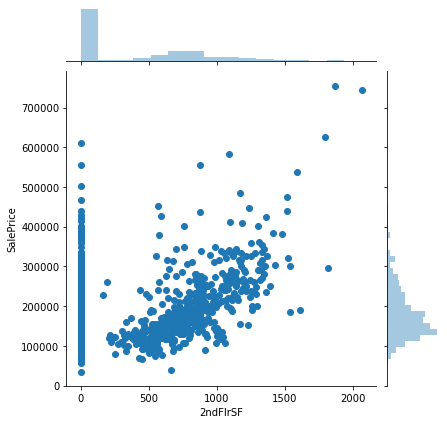

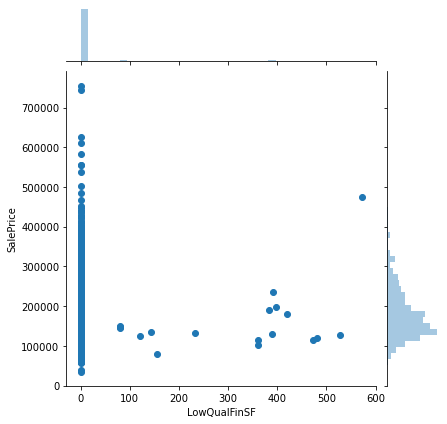

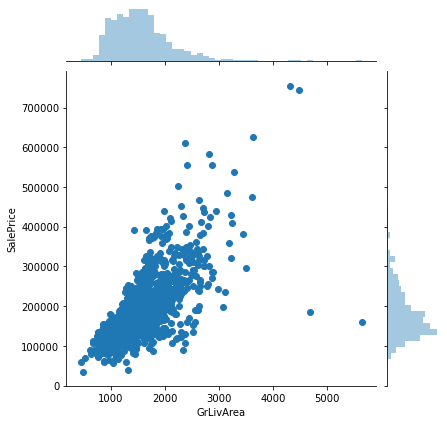

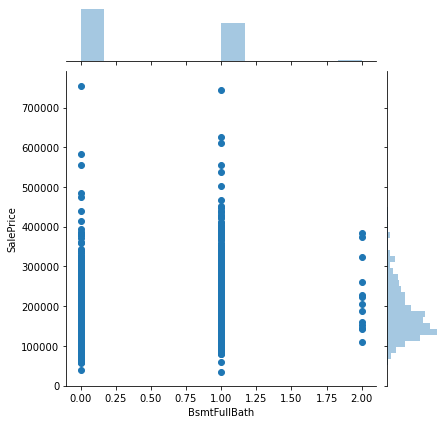

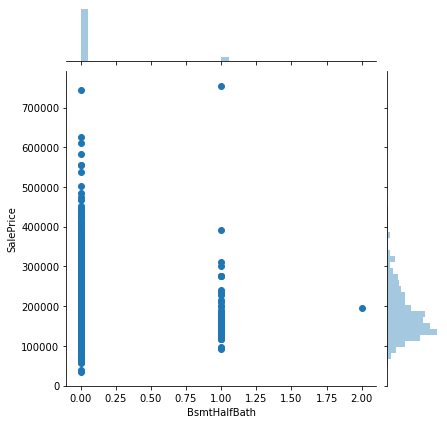

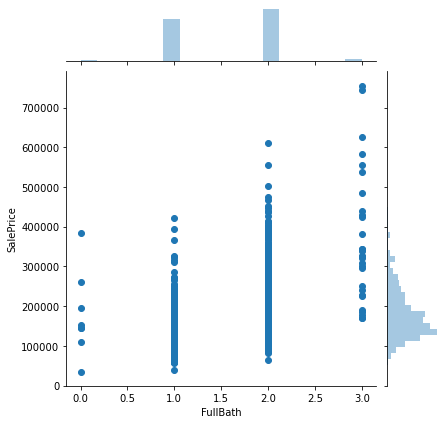

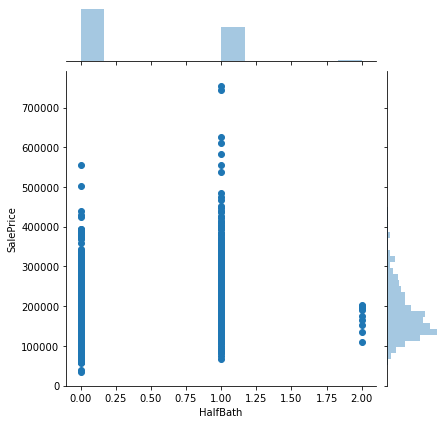

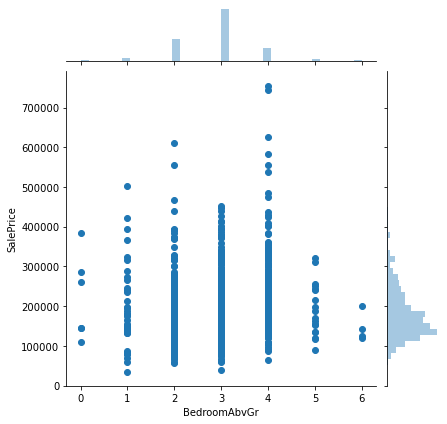

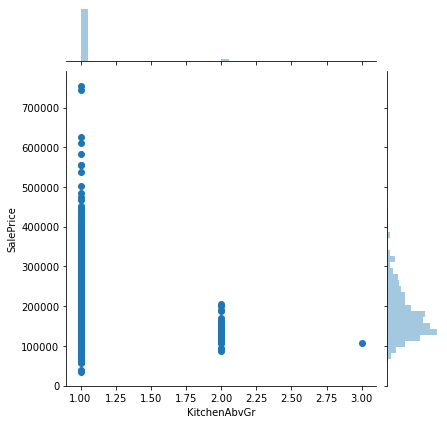

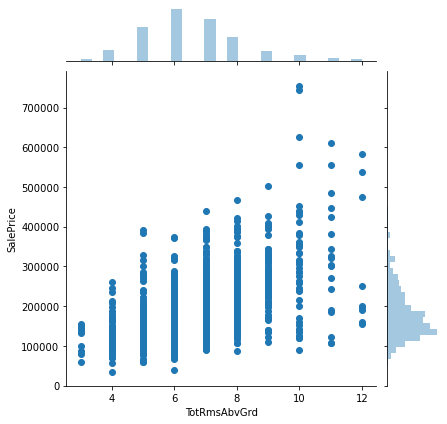

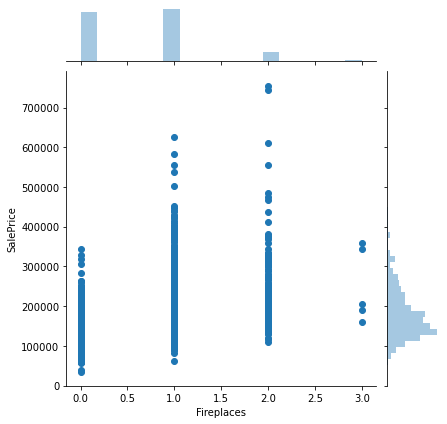

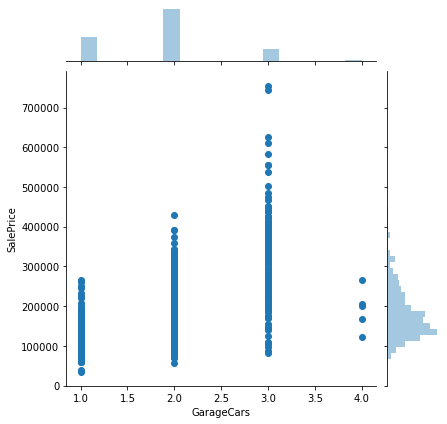

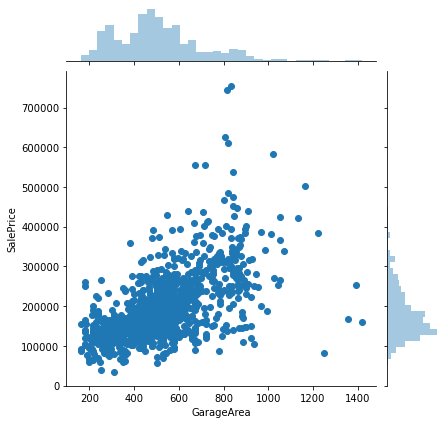

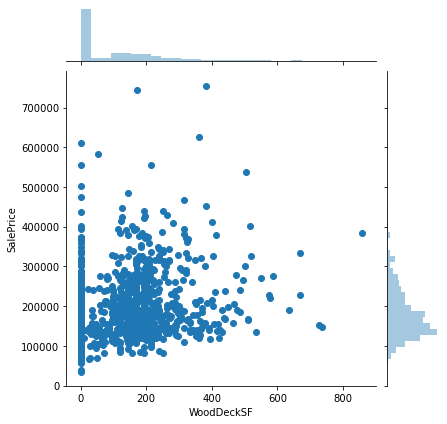

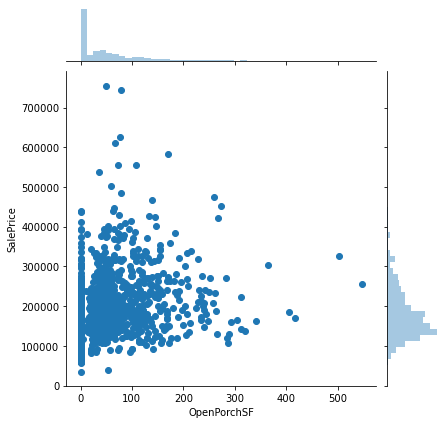

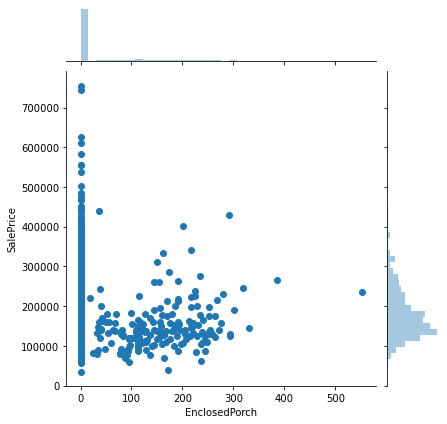

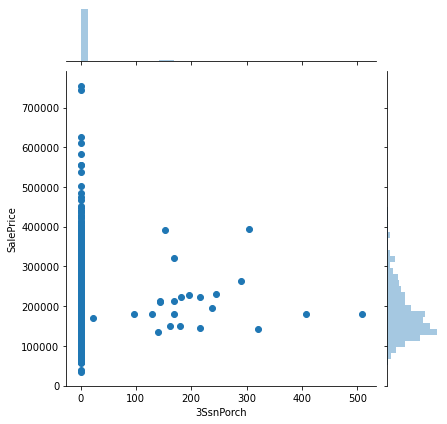

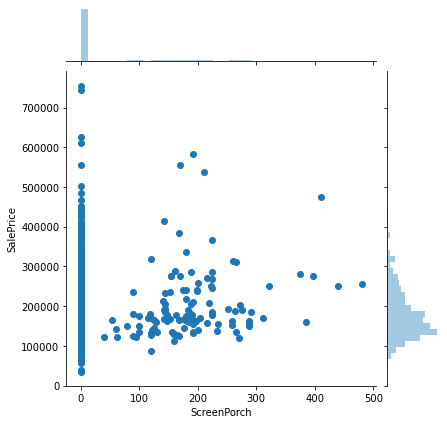

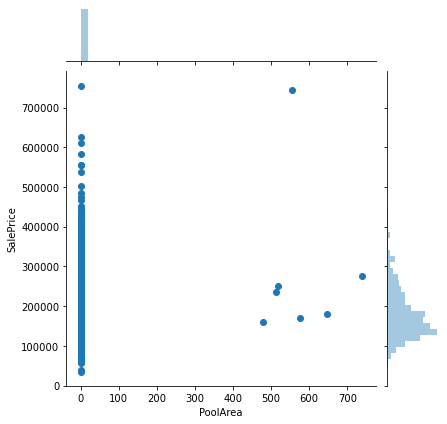

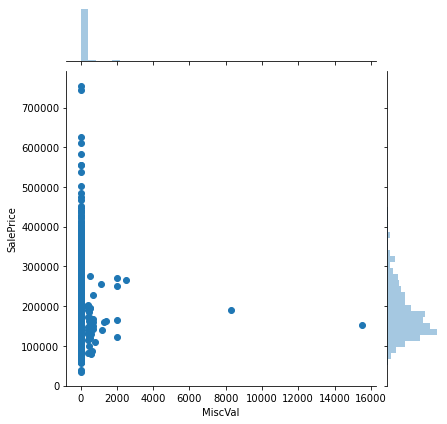

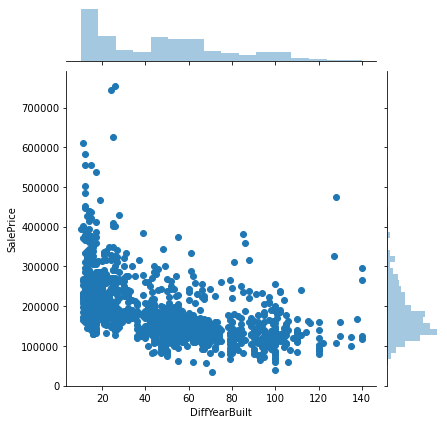

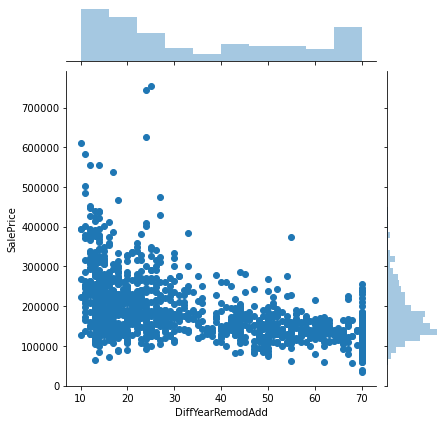

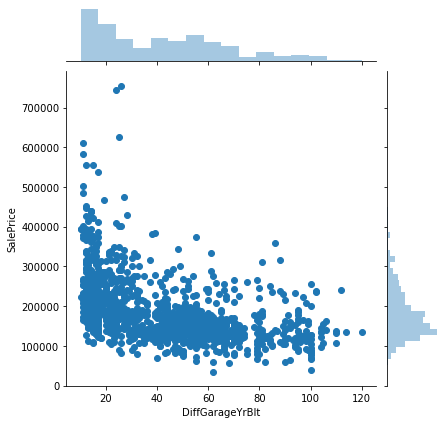

In [18]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)


<Figure size 432x288 with 0 Axes>

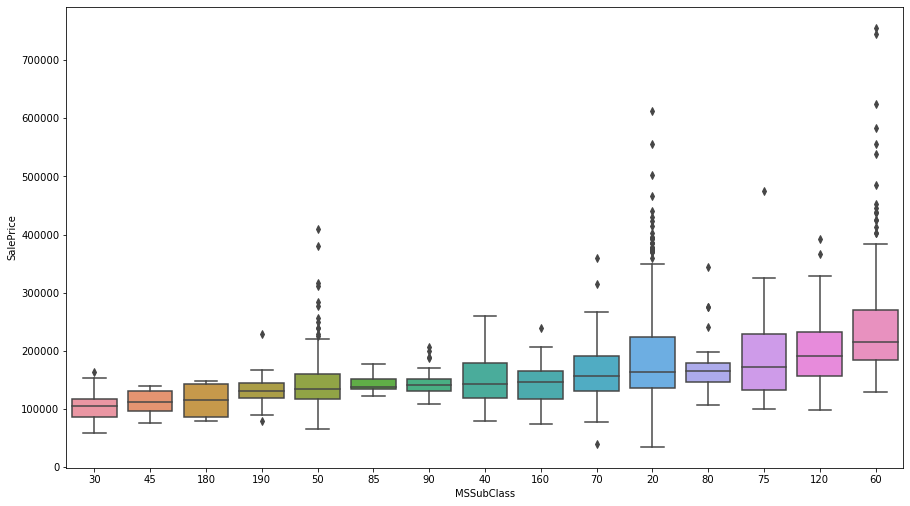

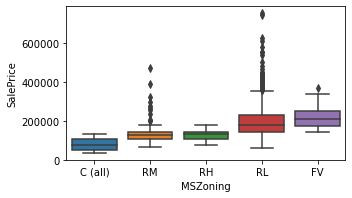

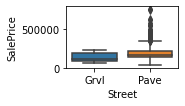

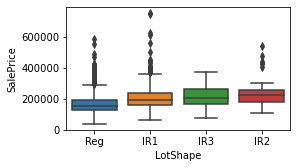

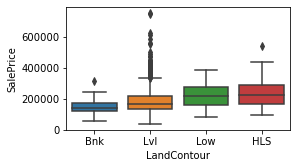

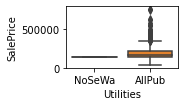

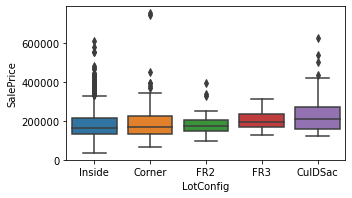

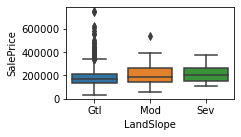

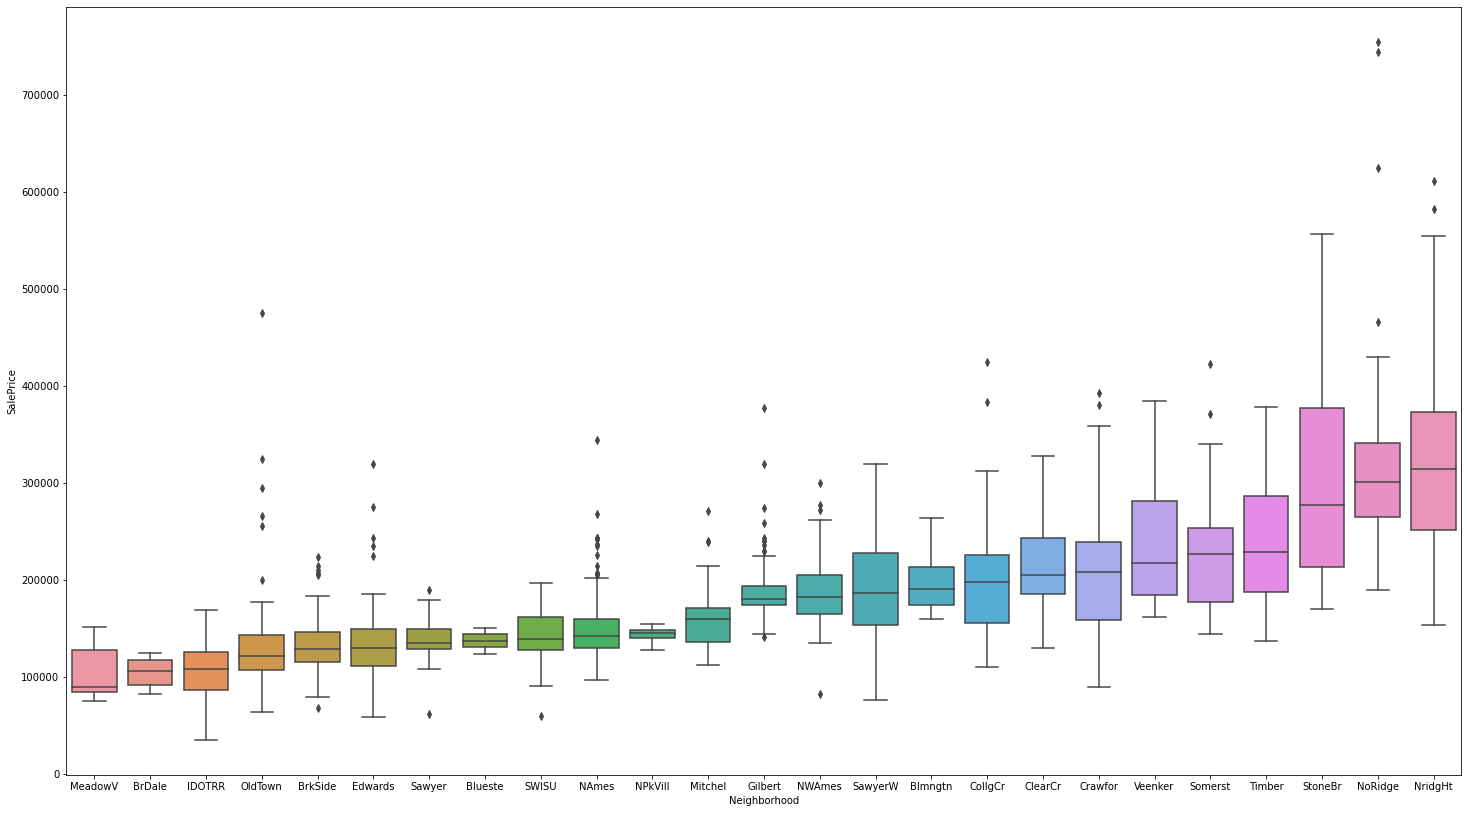

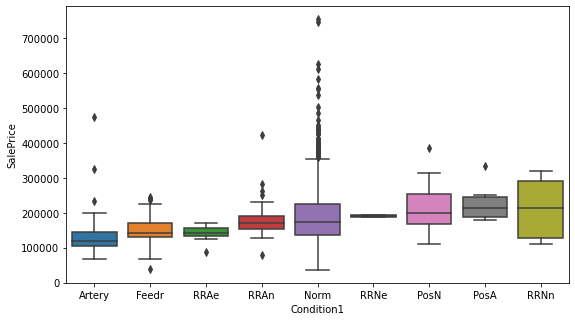

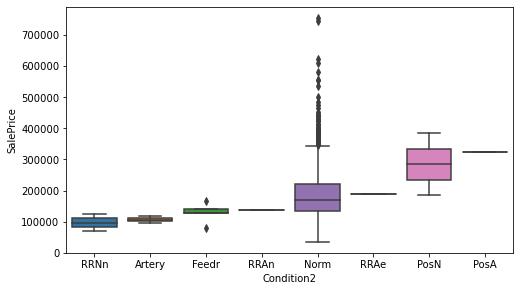

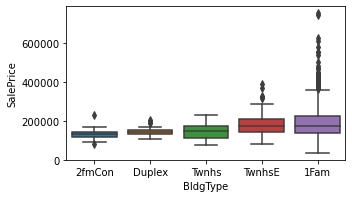

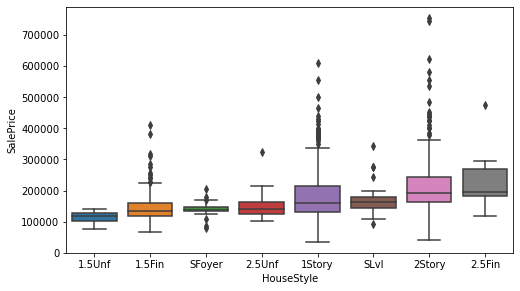

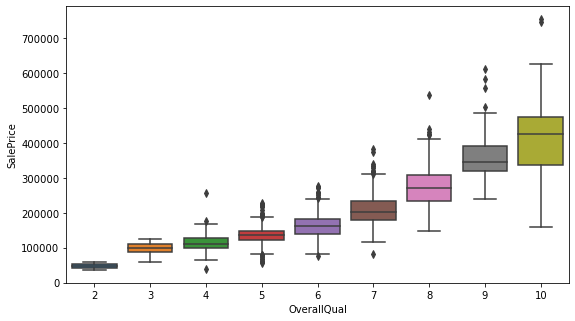

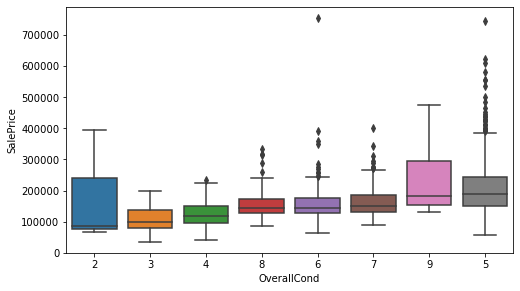

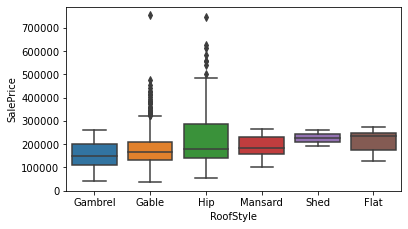

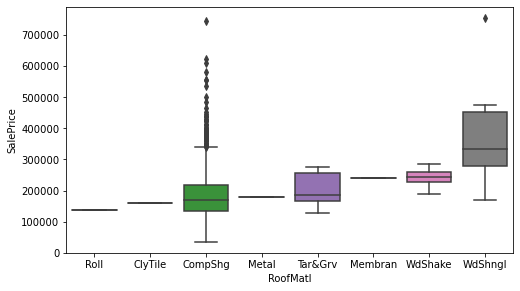

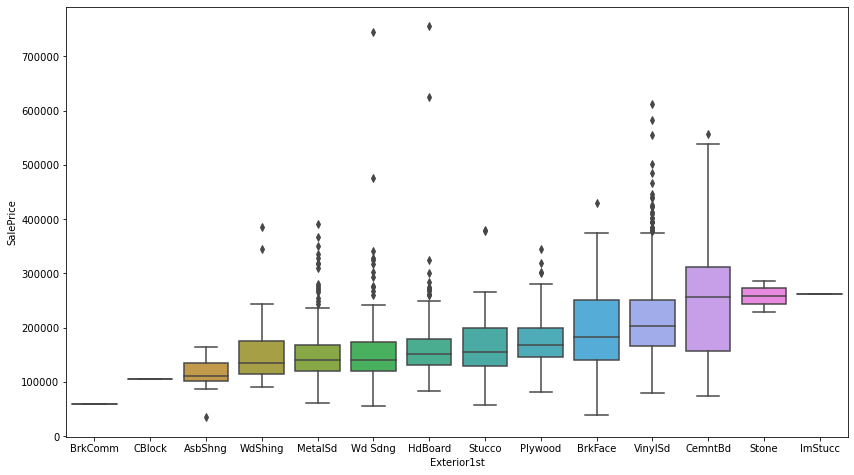

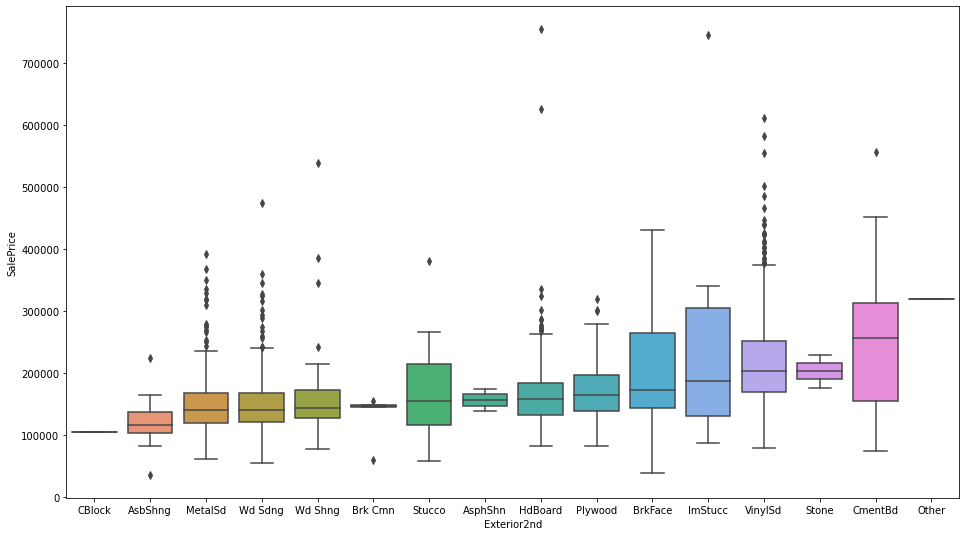

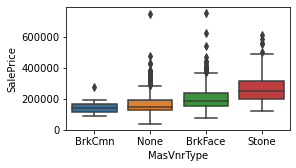

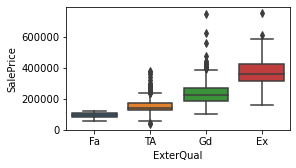

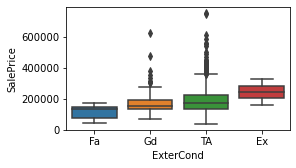

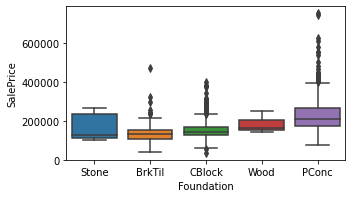

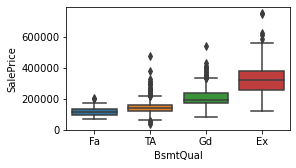

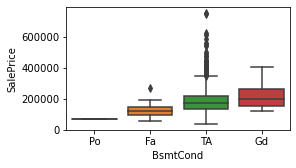

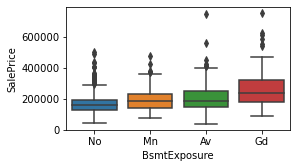

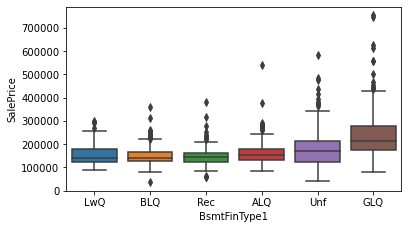

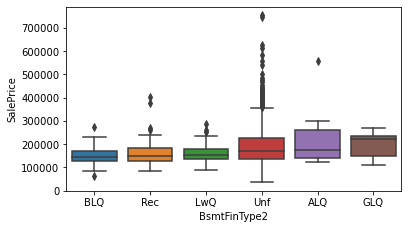

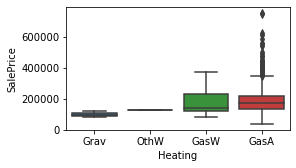

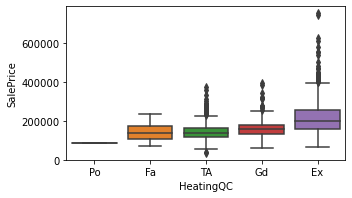

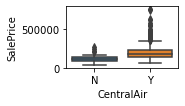

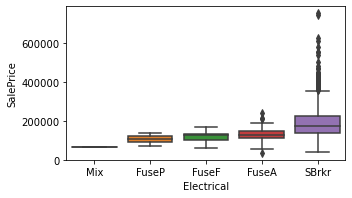

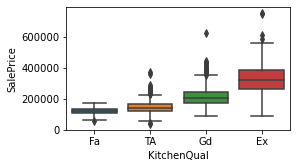

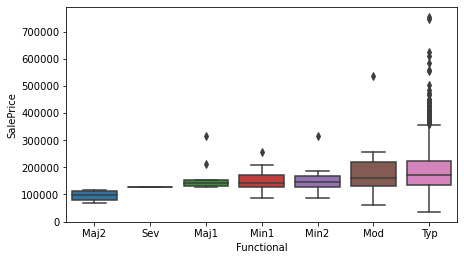

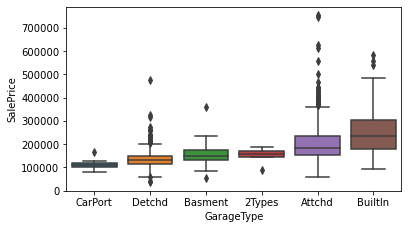

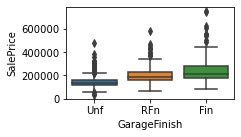

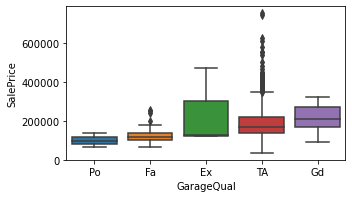

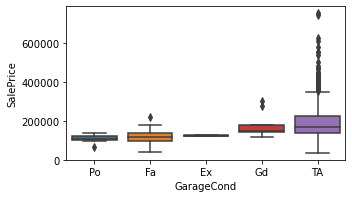

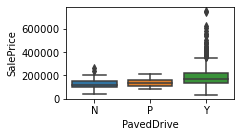

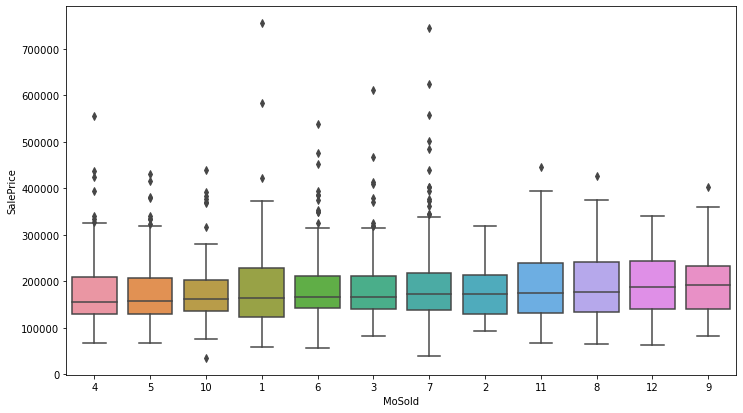

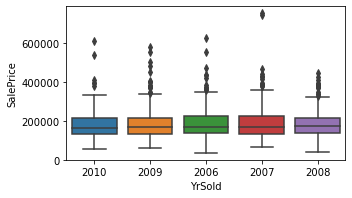

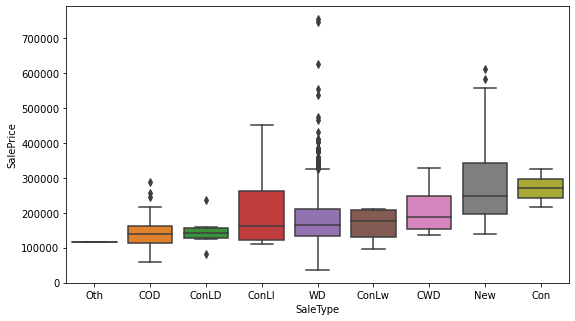

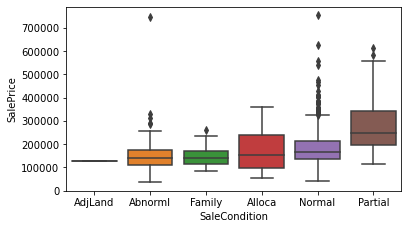

In [19]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, out_col)


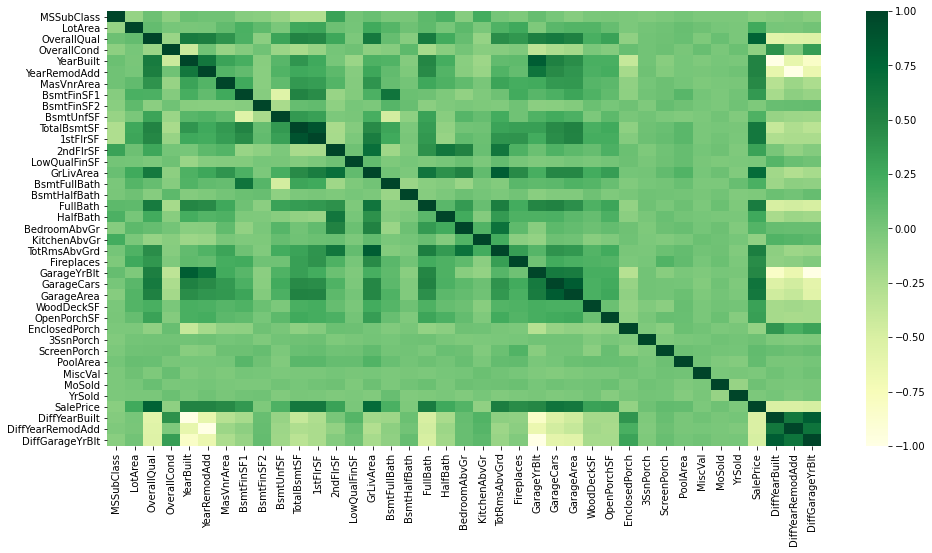

In [20]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_data.corr(), cmap="YlGn", annot=False)
plt.show()


In [21]:
# Dumifying all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df_data[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df_data = pd.concat([df_data, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df_data.drop([col], axis = 1, inplace = True)

df_data.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,9550,1915,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


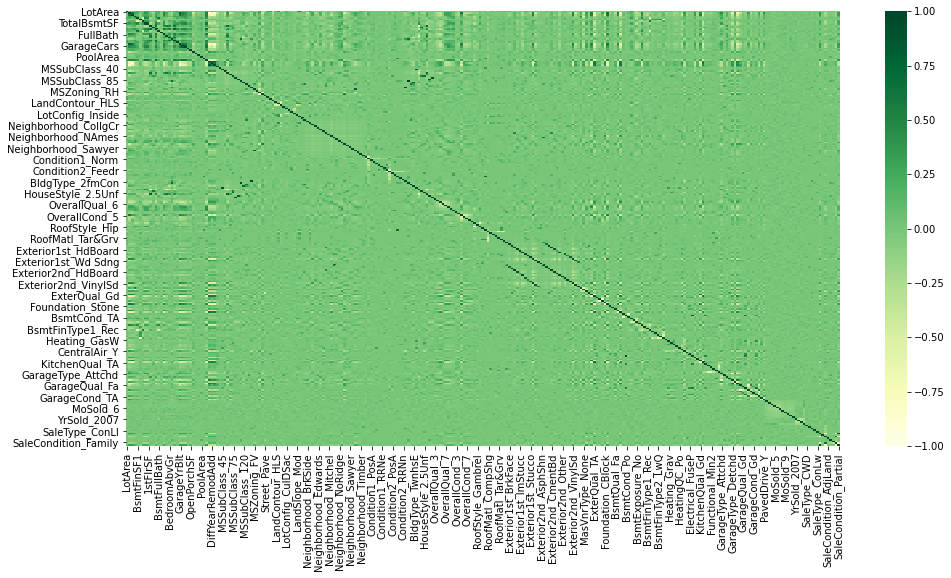

In [22]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_data.corr(), cmap="YlGn", annot=False)
plt.show()


In [23]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(df_data[num_col]))
# Outlier Removed Records
selected = df_data[num_col][(z < 3).all(axis=1)]
df_data = df_data.loc[selected.index]
df_data

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
6,10084,2004,2005,186.0,1369,0,317,1686,1694,0,...,0,0,0,0,1,0,0,0,1,0
10,11200,1965,1965,0.0,906,0,134,1040,1040,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,9262,2008,2009,194.0,0,0,1573,1573,1578,0,...,0,0,1,0,0,0,0,0,0,1
1452,3675,2005,2005,80.0,547,0,0,547,1072,0,...,0,0,0,0,1,0,0,0,1,0
1454,7500,2004,2005,0.0,410,0,811,1221,1221,0,...,0,0,0,0,1,0,0,0,1,0
1455,7917,1999,2000,0.0,0,0,953,953,953,694,...,0,0,0,0,1,0,0,0,1,0


In [24]:
# Preparing Test and Train Set

y = df_data.loc[:, out_col]
X = df_data.loc[:, df_data.columns != out_col]

# scale
scaler = StandardScaler()
scaler.fit(X)

# split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)


In [25]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9529947774227044
0.8882460000646258


In [26]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-372406.215, 'constant'),
 (70383.695, 'MSZoning_FV'),
 (63277.06, 'MSZoning_RH'),
 (-57961.906, 'Street_Pave'),
 (55372.426, 'SaleCondition_AdjLand'),
 (52065.398, 'Foundation_Stone'),
 (51320.112, 'MSZoning_RL'),
 (-50210.859, 'MSSubClass_180'),
 (-49627.301, 'MSSubClass_190'),
 (-49152.226, 'SaleCondition_Alloca'),
 (49102.864, 'MSZoning_RM'),
 (-40300.092, 'MSSubClass_85'),
 (-39566.634, 'ExterQual_Fa'),
 (-34695.501, 'MSSubClass_80'),
 (-32751.934, 'MSSubClass_45'),
 (30491.125, 'HouseStyle_1.5Unf'),
 (30105.873, 'Exterior2nd_CmentBd'),
 (-29836.245, 'Neighborhood_MeadowV'),
 (-29815.585, 'MSSubClass_160'),
 (-29063.539, 'MSSubClass_90'),
 (-29063.539, 'BldgType_Duplex'),
 (28002.566, 'OverallCond_9'),
 (27066.393, 'SaleCondition_Partial'),
 (-26862.673, 'RoofMatl_WdShake'),
 (26461.306, 'BldgType_2fmCon'),
 (-26274.95, 'OverallQual_4'),
 (-26236.976, 'OverallQual_6'),
 (26134.565, 'SaleType_CWD'),
 (-26124.879, 'OverallQual_3'),
 (-25487.995, 'Neighborhood_ClearCr'),
 (25428.41

In [ ]:
#Summary:

#Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
#Simple Linear Regression has not helped us in the feature selection.

In [27]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [28]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043883,0.067344,0.004388,1.017318e-03,0.0001,{'alpha': 0.0001},-15476.688840,-16883.479696,-13332.544446,-15862.061152,...,-15284.095648,1175.820494,25,-9467.942141,-9015.197517,-9720.561408,-9365.295880,-9628.063284,-9439.412046,245.315875
1,0.010572,0.001017,0.004189,1.164512e-03,0.001,{'alpha': 0.001},-15461.420696,-16878.054278,-13321.602868,-15845.380231,...,-15271.995307,1176.709922,24,-9468.714400,-9016.080903,-9723.105521,-9367.298895,-9629.292854,-9440.898515,245.680220
2,0.008577,0.001197,0.003191,3.989458e-04,0.01,{'alpha': 0.01},-15348.397965,-16835.365150,-13232.477341,-15700.128405,...,-15172.224618,1184.998424,23,-9477.024171,-9025.404523,-9747.418524,-9383.454125,-9640.009214,-9454.662111,248.954848
3,0.007181,0.000399,0.002992,4.909339e-07,0.05,{'alpha': 0.05},-15100.663642,-16651.859722,-13051.542515,-15315.366329,...,-14907.233782,1177.445066,21,-9507.444139,-9063.106461,-9813.690261,-9429.231043,-9671.540319,-9497.002445,254.449350
4,0.008577,0.001196,0.003590,7.979036e-04,0.1,{'alpha': 0.1},-14897.561385,-16458.350799,-12994.388760,-15026.840035,...,-14708.925707,1134.013519,20,-9537.979596,-9100.806787,-9856.211459,-9479.147604,-9695.603226,-9533.949734,253.225906


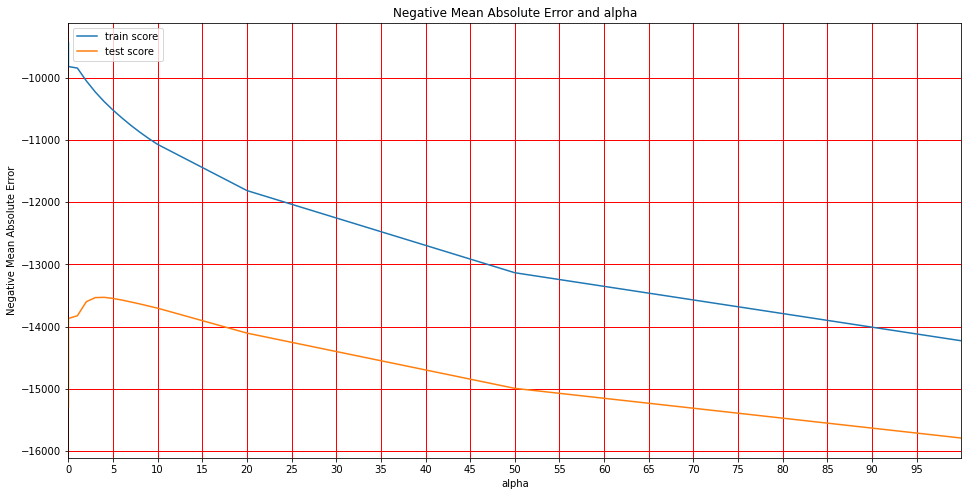

In [29]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()


In [30]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))


0.9467314017299434
0.907402115694323


In [31]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)


[(-410443.893, 'constant'),
 (27933.233, 'OverallQual_9'),
 (21325.43, 'Neighborhood_StoneBr'),
 (16803.989, 'Functional_Typ'),
 (-16546.566, 'KitchenQual_Gd'),
 (16526.894, 'Neighborhood_Crawfor'),
 (-15654.602, 'KitchenQual_TA'),
 (-14506.402, 'Neighborhood_MeadowV'),
 (-14232.754, 'Functional_Mod'),
 (-13529.569, 'SaleCondition_Alloca'),
 (12880.199, 'MSZoning_FV'),
 (-12292.878, 'OverallQual_4'),
 (11951.682, 'Exterior1st_BrkFace'),
 (-11763.256, 'MSSubClass_160'),
 (11382.118, 'SaleCondition_Partial'),
 (-11077.185, 'OverallCond_3'),
 (-10757.648, 'Neighborhood_Edwards'),
 (-10659.765, 'OverallQual_6'),
 (10154.899, 'OverallQual_10'),
 (-9918.739, 'BsmtQual_TA'),
 (-9898.831, 'BsmtQual_Gd'),
 (9680.921, 'BsmtExposure_Gd'),
 (9135.142, 'Neighborhood_NoRidge'),
 (9082.075, 'OverallCond_8'),
 (-9064.074, 'Condition1_RRAe'),
 (8919.449, 'Neighborhood_BrDale'),
 (-8919.435, 'OverallCond_4'),
 (-8835.691, 'BldgType_Twnhs'),
 (8510.37, 'Condition1_Norm'),
 (-8435.99, 'KitchenQual_Fa'),
 

In [ ]:
#Ridge regression gave us a complex model with most of the coefficients as non-zero values.
#Ridge regression has not helped us in the feature selection.


In [32]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   17.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085754,0.011856,0.012497,0.006249,0.0001,{'alpha': 0.0001},-15340.211213,-16908.978020,-13328.808600,-16051.222642,...,-15273.197665,1212.765174,26,-9473.943786,-9016.603997,-9721.683539,-9366.333692,-9629.391990,-9441.591401,245.375370
1,0.102752,0.020577,0.001394,0.002787,0.001,{'alpha': 0.001},-15340.064227,-16906.295339,-13328.345870,-16041.478324,...,-15269.938199,1211.230405,25,-9473.940122,-9016.585563,-9721.708187,-9366.350350,-9629.389546,-9441.594754,245.385890
2,0.097339,0.011861,0.003391,0.000489,0.01,{'alpha': 0.01},-15338.883856,-16910.601233,-13323.456313,-15943.954926,...,-15243.954767,1204.807131,24,-9473.987141,-9016.470711,-9722.128030,-9366.630280,-9629.631604,-9441.769553,245.542670
3,0.101528,0.008307,0.003989,0.001261,0.05,{'alpha': 0.05},-15341.586591,-16947.668856,-13301.926035,-15767.324547,...,-15215.544212,1202.404357,23,-9474.823595,-9017.117658,-9724.514874,-9369.018032,-9631.209968,-9443.336825,245.981662
4,0.123032,0.022416,0.003391,0.002053,0.1,{'alpha': 0.1},-15331.187479,-16940.705972,-13275.012918,-15724.244747,...,-15199.095772,1204.486219,22,-9475.948907,-9017.984163,-9727.793488,-9371.838876,-9633.128697,-9445.338826,246.583414


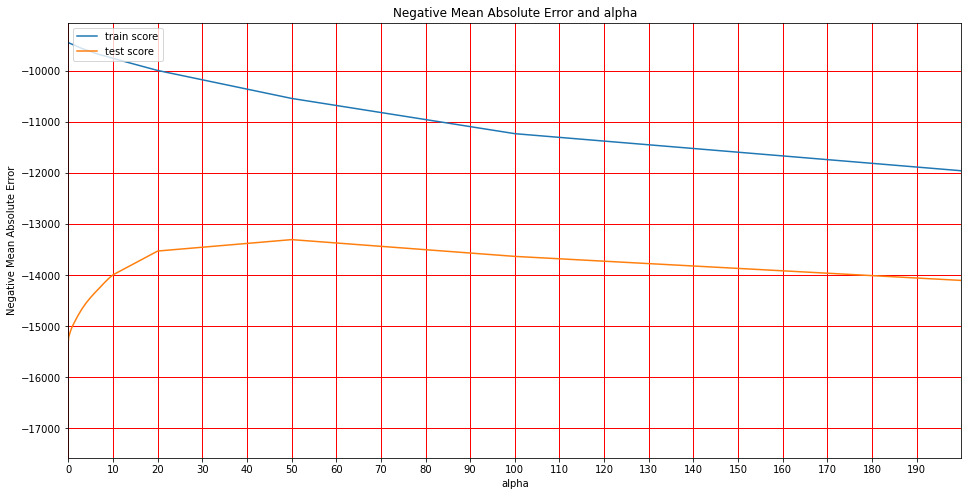

In [34]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()


In [35]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))


0.9451847137936265
0.9072077614423775


In [36]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1647514.752, 'constant'),
 (43561.67, 'OverallQual_9'),
 (-30774.304, 'SaleCondition_Alloca'),
 (27499.091, 'Neighborhood_StoneBr'),
 (25561.928, 'OverallQual_10'),
 (24798.86, 'Neighborhood_Crawfor'),
 (-19397.587, 'Functional_Mod'),
 (17486.189, 'SaleCondition_Partial'),
 (17466.864, 'Functional_Typ'),
 (-16712.179, 'KitchenQual_Gd'),
 (-16181.848, 'KitchenQual_TA'),
 (-15819.193, 'Neighborhood_MeadowV'),
 (14384.957, 'OverallQual_8'),
 (13231.718, 'Exterior1st_BrkFace'),
 (-12403.761, 'MSSubClass_160'),
 (11996.871, 'MSZoning_FV'),
 (11982.08, 'Neighborhood_NoRidge'),
 (-10638.059, 'OverallCond_4'),
 (-10590.082, 'OverallCond_3'),
 (10196.147, 'BsmtExposure_Gd'),
 (-9751.282, 'GarageCond_Fa'),
 (-9655.359, 'Condition1_RRAe'),
 (8305.739, 'Neighborhood_BrkSide'),
 (-8191.069, 'BsmtQual_TA'),
 (8128.435, 'Neighborhood_BrDale'),
 (-7823.482, 'BsmtQual_Gd'),
 (-7715.455, 'KitchenQual_Fa'),
 (-7613.36, 'Neighborhood_Edwards'),
 (7471.525, 'Condition1_Norm'),
 (7322.531, 'BsmtFinType1_

In [ ]:
#Lasso Regression gave us a simpler model with most of the coefficients as zero values.
#Lasso Regression has helped us in the feature selection.


In [37]:
# Running RFE with the output number of the variable equal to 30
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [38]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRNn',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA'],
      dtype='object')

In [39]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [40]:
# MODEL 1
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(df_data[auto_selected_predictors]))


Parameters obtained for ['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRNn', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA']
const                    -0.166722
YearBuilt               127.415198
YearRemodAdd             29.364743
1stFlrSF                125.505907
2ndFlrSF                 79.521119
LowQualFinSF            -48.621608
GarageYrBlt            -116.573228
DiffYearBuilt          -464.194450
DiffYearRemodAdd       -366.143995
DiffGarageYrBlt        -220.206024
Condition2_Feedr      -8451.791965
Condition2_Norm      -17283.016586
Condition2_RRNn     

In [41]:
# MODEL 2
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'Functional_Mod', 'SaleCondition_Partial', 'Functional_Typ', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'Neighborhood_BrkSide', 'BsmtQual_TA', 'Neighborhood_BrDale', 'BsmtQual_Gd', 'KitchenQual_Fa', 'Neighborhood_Edwards', 'Condition1_Norm', 'BsmtFinType1_GLQ', 'OverallCond_8']
const                    224483.923922
OverallQual_9             96245.556226
SaleCondition_Alloca     -69744.053969
Neighborhood_StoneBr      34801.882371
OverallQual_10            87931.591937
Neighborhood_Crawfor      32406.811484
Functional_Mod             -117.741380
SaleCondition_Partial     25003.875718
Functional_Typ              824.252179
KitchenQual_Gd           -37316.589

In [42]:
# MODEL 3
# We got better VIF values with the features selected by Lasso, hence refining the model based on KPIs.
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'Functional_Mod', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'Neighborhood_BrkSide', 'BsmtQual_TA', 'Neighborhood_BrDale', 'BsmtQual_Gd', 'KitchenQual_Fa', 'Neighborhood_Edwards', 'Condition1_Norm', 'BsmtFinType1_GLQ', 'OverallCond_8']
const                    225227.790832
OverallQual_9             96283.565800
SaleCondition_Alloca     -69674.968881
Neighborhood_StoneBr      34745.556914
OverallQual_10            87950.405679
Neighborhood_Crawfor      32386.242912
Functional_Mod             -867.864590
SaleCondition_Partial     25035.064682
KitchenQual_Gd           -37315.601286
KitchenQual_TA           -63960.043413
Neighborhood_M

In [43]:
# MODEL 4
lasso_selected_features.remove('Functional_Mod')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'Neighborhood_BrkSide', 'BsmtQual_TA', 'Neighborhood_BrDale', 'BsmtQual_Gd', 'KitchenQual_Fa', 'Neighborhood_Edwards', 'Condition1_Norm', 'BsmtFinType1_GLQ', 'OverallCond_8']
const                    225227.438649
OverallQual_9             96280.148997
SaleCondition_Alloca     -69668.432017
Neighborhood_StoneBr      34743.065910
OverallQual_10            87944.556500
Neighborhood_Crawfor      32392.365623
SaleCondition_Partial     25039.139279
KitchenQual_Gd           -37312.414243
KitchenQual_TA           -63964.563667
Neighborhood_MeadowV     -38321.243959
OverallQual_8             45672.

In [44]:
# MODEL 5
lasso_selected_features.remove('OverallCond_8')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'Neighborhood_BrkSide', 'BsmtQual_TA', 'Neighborhood_BrDale', 'BsmtQual_Gd', 'KitchenQual_Fa', 'Neighborhood_Edwards', 'Condition1_Norm', 'BsmtFinType1_GLQ']
const                    224859.974324
OverallQual_9             96534.020760
SaleCondition_Alloca     -69660.097492
Neighborhood_StoneBr      34772.549744
OverallQual_10            88236.984393
Neighborhood_Crawfor      32141.572436
SaleCondition_Partial     25135.743298
KitchenQual_Gd           -37177.076558
KitchenQual_TA           -63727.526429
Neighborhood_MeadowV     -38580.568764
OverallQual_8             45753.826567
Exterior1s

In [45]:
# MODEL 6
lasso_selected_features.remove('Neighborhood_Edwards')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'Neighborhood_BrkSide', 'BsmtQual_TA', 'Neighborhood_BrDale', 'BsmtQual_Gd', 'KitchenQual_Fa', 'Condition1_Norm', 'BsmtFinType1_GLQ']
const                    223599.360571
OverallQual_9             97825.018110
SaleCondition_Alloca     -68085.195206
Neighborhood_StoneBr      35332.455019
OverallQual_10            89502.472150
Neighborhood_Crawfor      33130.218729
SaleCondition_Partial     25298.110516
KitchenQual_Gd           -36250.338904
KitchenQual_TA           -63335.291855
Neighborhood_MeadowV     -36110.845603
OverallQual_8             46174.954763
Exterior1st_BrkFace       32115.30

In [46]:
# MODEL 7
lasso_selected_features.remove('Neighborhood_BrDale')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'Neighborhood_BrkSide', 'BsmtQual_TA', 'BsmtQual_Gd', 'KitchenQual_Fa', 'Condition1_Norm', 'BsmtFinType1_GLQ']
const                    223578.329268
OverallQual_9             97835.937546
SaleCondition_Alloca     -68089.463738
Neighborhood_StoneBr      35296.565971
OverallQual_10            89521.359026
Neighborhood_Crawfor      33129.231655
SaleCondition_Partial     25308.920401
KitchenQual_Gd           -36249.888496
KitchenQual_TA           -63321.794864
Neighborhood_MeadowV     -36214.133934
OverallQual_8             46191.641006
Exterior1st_BrkFace       32108.253468
MSSubClass_160    

In [47]:
# MODEL 8
lasso_selected_features.remove('Condition1_Norm')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'Neighborhood_BrkSide', 'BsmtQual_TA', 'BsmtQual_Gd', 'KitchenQual_Fa', 'BsmtFinType1_GLQ']
const                    226653.104290
OverallQual_9             97883.839029
SaleCondition_Alloca     -67264.558607
Neighborhood_StoneBr      35455.887005
OverallQual_10            89685.347613
Neighborhood_Crawfor      33302.620501
SaleCondition_Partial     25216.843885
KitchenQual_Gd           -36425.558792
KitchenQual_TA           -63623.761253
Neighborhood_MeadowV     -35975.778317
OverallQual_8             46161.017260
Exterior1st_BrkFace       31769.333417
MSSubClass_160           -26540.56671

In [48]:
# MODEL 9
lasso_selected_features.remove('Neighborhood_BrkSide')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'BsmtQual_TA', 'BsmtQual_Gd', 'KitchenQual_Fa', 'BsmtFinType1_GLQ']
const                    226166.836066
OverallQual_9             98213.332609
SaleCondition_Alloca     -66090.403977
Neighborhood_StoneBr      35397.080998
OverallQual_10            90047.467497
Neighborhood_Crawfor      33609.429657
SaleCondition_Partial     25305.476781
KitchenQual_Gd           -36267.840422
KitchenQual_TA           -63694.433825
Neighborhood_MeadowV     -35890.033741
OverallQual_8             46213.847886
Exterior1st_BrkFace       32006.791214
MSSubClass_160           -26374.476483
MSZoning_FV           

In [49]:
# MODEL 9
lasso_selected_features.remove('MSZoning_FV')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'BsmtQual_TA', 'BsmtQual_Gd', 'KitchenQual_Fa', 'BsmtFinType1_GLQ']
const                    225717.168072
OverallQual_9             98578.432909
SaleCondition_Alloca     -65893.060945
Neighborhood_StoneBr      33800.001634
OverallQual_10            92970.012743
Neighborhood_Crawfor      33386.124766
SaleCondition_Partial     26399.991776
KitchenQual_Gd           -35675.546686
KitchenQual_TA           -63560.676231
Neighborhood_MeadowV     -37703.435051
OverallQual_8             46673.125734
Exterior1st_BrkFace       32016.375765
MSSubClass_160           -23571.247083
Neighborhood_NoRidge      63571.28397

In [50]:
# MODEL 10
lasso_selected_features.remove('BsmtQual_Gd')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'Condition1_RRAe', 'BsmtQual_TA', 'KitchenQual_Fa', 'BsmtFinType1_GLQ']
const                    219008.769218
OverallQual_9            104565.407111
SaleCondition_Alloca     -61992.805923
Neighborhood_StoneBr      33448.658343
OverallQual_10            99542.717836
Neighborhood_Crawfor      32864.026376
SaleCondition_Partial     27382.357095
KitchenQual_Gd           -36972.568190
KitchenQual_TA           -64138.110159
Neighborhood_MeadowV     -38155.486644
OverallQual_8             47834.348494
Exterior1st_BrkFace       31585.310486
MSSubClass_160           -24040.265712
Neighborhood_NoRidge      62859.997980
OverallCond_4

In [51]:
# MODEL 11
lasso_selected_features.remove('Condition1_RRAe')
make_lr_model_mp(list(df_data[lasso_selected_features]))


Parameters obtained for ['OverallQual_9', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'KitchenQual_Gd', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_8', 'Exterior1st_BrkFace', 'MSSubClass_160', 'Neighborhood_NoRidge', 'OverallCond_4', 'OverallCond_3', 'BsmtExposure_Gd', 'GarageCond_Fa', 'BsmtQual_TA', 'KitchenQual_Fa', 'BsmtFinType1_GLQ']
const                    219025.017070
OverallQual_9            104895.702943
SaleCondition_Alloca     -61893.415463
Neighborhood_StoneBr      33578.496701
OverallQual_10            99931.673392
Neighborhood_Crawfor      33001.218072
SaleCondition_Partial     27207.150351
KitchenQual_Gd           -37108.934817
KitchenQual_TA           -64262.798163
Neighborhood_MeadowV     -38017.635676
OverallQual_8             48140.271099
Exterior1st_BrkFace       31730.315559
MSSubClass_160           -23824.907351
Neighborhood_NoRidge      63071.646898
OverallCond_4            -22259.

In [52]:
# final model parameters
lasso_selected_features

['OverallQual_9',
 'SaleCondition_Alloca',
 'Neighborhood_StoneBr',
 'OverallQual_10',
 'Neighborhood_Crawfor',
 'SaleCondition_Partial',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Neighborhood_MeadowV',
 'OverallQual_8',
 'Exterior1st_BrkFace',
 'MSSubClass_160',
 'Neighborhood_NoRidge',
 'OverallCond_4',
 'OverallCond_3',
 'BsmtExposure_Gd',
 'GarageCond_Fa',
 'BsmtQual_TA',
 'KitchenQual_Fa',
 'BsmtFinType1_GLQ']

Text(0, 0.5, 'Sales Price')

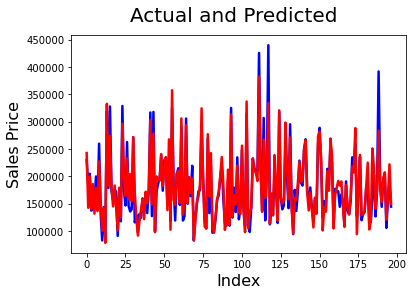

In [54]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label


Text(0, 0.5, 'Sales Price')

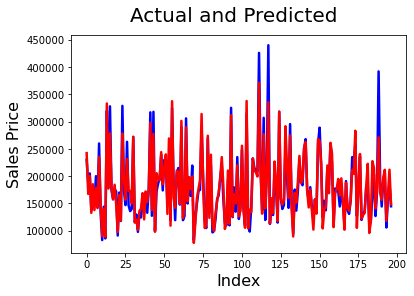

In [55]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label


Text(0, 0.5, 'Sales Price')

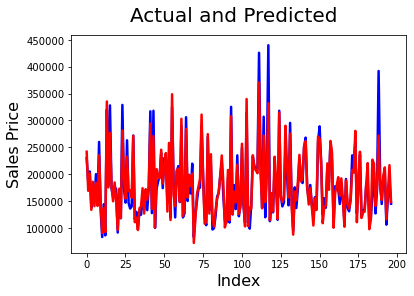

In [56]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label


In [57]:
print("Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.")
print("Simple Linear Regression model is fairly complex, hence we would not consider that.")
print("Ridge Regression model is fairly complex, hence we would not consider that.")
print("Optimum value of lambda for Ridge Regression is 4")
print("Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.")
print("Optimum value of lambda for Lasso Regression is 50")
print("Most important 30 features that are affecting Sales pricing are:")
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')


Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.
Simple Linear Regression model is fairly complex, hence we would not consider that.
Ridge Regression model is fairly complex, hence we would not consider that.
Optimum value of lambda for Ridge Regression is 4
Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
Optimum value of lambda for Lasso Regression is 50
Most important 30 features that are affecting Sales pricing are:
OverallQual_9                           Score: 43561.67
SaleCondition_Alloca                    Score: -30774.304
Neighborhood_StoneBr                    Score: 27499.091
OverallQual_10                          Score: 25561.928
Neighborhood_Crawfor                    Score: 24798.86
Functional_Mod                          Score: -19397.587
SaleCondition_Partial                   Score: 17486.189
Functional_Typ                          Score: 17466.8

In [ ]:
# few of the major influencers for Sales Pricing are:

#OverallCond
#SaleCondition
#Neighborhood
#Functional
#KitchenQual
#Exterior1st
#Condition1
#MSSubClass
#BsmtExposure
#MSZoning